In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
import folium
%matplotlib inline

In [2]:
data_ = pd.read_csv('origin_date_x_y_data_2.csv',index_col=0)
data_distance = pd.read_csv('bee_pos_distance_date.csv', index_col=0)

In [43]:
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for i in range(len(data)):
    lat = data['Latitude'][i]
    lng = data['Longitude'][i]
    if data['Lab Status'][i] == 'Positive ID':
        incidents.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.4
            )
        )
    else:
        incidents.add_child(
                folium.CircleMarker(
                    [lat, lng],
                    radius=3, # define how big you want the circle markers to be
                    color='yellow',
                    fill=True,
                    fill_color='yellow',
                    fill_opacity=0.4
                )
            )

# Add incidents to map
san_map = folium.Map()
san_map.add_child(incidents)

san_map

In [15]:
def all_every_type_plot(data):

    data_negative = data[data['Lab Status'] =='Negative ID']
    data_positive = data[data['Lab Status'] =='Positive ID']
    data_unprocessed = data[data['Lab Status'] =='Unprocessed']
    data_unverified = data[data['Lab Status'] =='Unverified']

    plt.scatter(data_unverified['Longitude'],data_unverified['Latitude'],color='g',marker='+',s=10)
    plt.scatter(data_negative['Longitude'],data_negative['Latitude'],color='b',marker='v',s=10)
    plt.scatter(data_positive['Longitude'],data_positive['Latitude'],color='r',marker='D',s=30)
    plt.scatter(data_unprocessed['Longitude'],data_unprocessed['Latitude'],color='y',marker='o')

    plt.legend(['Unverified','Negative ID','Positive ID','Unprocessed'])
    plt.title('ALL_Bee_Lab_Status')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('ALL_Bee_Lab_Status.jpg')
    plt.show()

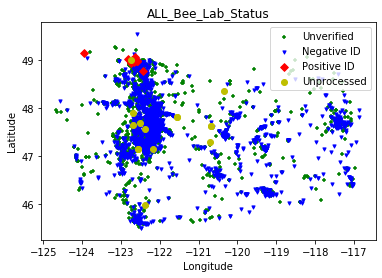

In [44]:
all_every_type_plot(data_)

In [19]:
def rand(a,b):
	return (b - a) * random.random() + a

def make_matrix(m, n, fill=0.0):  # 创造一个指定大小的矩阵
    mat = []
    for i in range(m):
        mat.append([fill] * n)
    return mat

In [20]:
def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))
    
def sigmod_derivate(x):
    return x * (1 - x)

In [5]:
data_.head()

GlobalID Detection Date  \
0  {5AC8034E-5B46-4294-85F0-5B13117EBEFE}     2019-12-08   
1  {5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041}     2019-10-30   
2  {13B67BCB-AFCE-4100-AD2B-76EF178BA228}     2020-01-15   
3  {124B9BFA-7F7B-4B8E-8A56-42E067F0F72E}     2019-09-19   
4  {BBBA5BA0-CAFB-43D3-8F1D-FB2D9CF777E0}     2019-08-31   

                                               Notes   Lab Status  \
0  One dead wasp seen in Blaine, and suspect flyi...  Positive ID   
1                        Hornet specimen sent to WSU  Positive ID   
2  Massive loss of bees, decapitated. No hornet s...   Unverified   
3  This was the colony that was found and destroy...  Positive ID   
4  I was cleaning my gutters when I heard a snapp...   Unverified   

                                        Lab Comments Submission Date  \
0                                                         2020-01-15   
1                                                         2020-01-15   
2                                                         2020-01-15   
3    Thanks for adding this, and the great pictures!      2020-02-04   
4  Thanks for this report. I can't verify it from...      2020-02-14   

    Latitude   Longitude        x        y  
0  48.980994 -122.688503  6383123  5968292  
1  48.971949 -122.700941  6381737  5969179  
2  48.939200 -122.661300  6386152  5972392  
3  49.149394 -123.943134  6243387  5951750  
4  48.723779 -122.354431  6420330  5993496

In [7]:
data_x_y = data_[data_['Lab Status']=='Positive ID']
index = []
for i in range(len(data_x_y)):
    index.append(i)
data_x_y.index = pd.Series(index)

In [10]:
import matplotlib.dates as mdate
data_x_y['Detection Date'] = pd.to_datetime(data_x_y['Detection Date'])
data_x_y['Detection Date'] = data_x_y['Detection Date'].map(lambda x:mdate.date2num(x))

In [13]:
s = (data_x_y['Detection Date'] - data_x_y['Detection Date'].min())/(data_x_y['Detection Date'].max() - data_x_y['Detection Date'].min())

#安全删除，如果用del是永久删除


#把规格化的那一列插入到数组中,最开始的14是我把他插到了第15lie

data_x_y.insert(10,'Date Normal',s)

In [24]:
data_x_y = data_x_y.sort_values(by='Detection Date')

In [26]:
data_x_y.shape

(14, 11)

In [27]:
index = []
for i in range(14):
    index.append(i)
data_x_y.index = pd.Series(index)

In [28]:
data_x_y.to_csv('sort_date_x_y_predict.csv')

In [31]:
import math
import random

random.seed(0)


def rand(a, b):
    return (b - a) * random.random() + a


def make_matrix(m, n, fill=0.0):
    mat = []
    for i in range(m):
        mat.append([fill] * n)
    return mat


def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


class BPNeuralNetwork:
    def __init__(self):
        self.input_n = 0
        self.hidden_n = 0
        self.output_n = 0
        self.input_cells = []
        self.hidden_cells = []
        self.output_cells = []
        self.input_weights = []
        self.output_weights = []
        self.input_correction = []
        self.output_correction = []

    def setup(self, ni, nh, no):
        self.input_n = ni + 1
        self.hidden_n = nh
        self.output_n = no
        # init cells
        self.input_cells = [1.0] * self.input_n
        self.hidden_cells = [1.0] * self.hidden_n
        self.output_cells = [1.0] * self.output_n
        # init weights
        self.input_weights = make_matrix(self.input_n, self.hidden_n)
        self.output_weights = make_matrix(self.hidden_n, self.output_n)
        # random activate
        for i in range(self.input_n):
            for h in range(self.hidden_n):
                self.input_weights[i][h] = rand(-0.2, 0.2)
        for h in range(self.hidden_n):
            for o in range(self.output_n):
                self.output_weights[h][o] = rand(-2.0, 2.0)
        # init correction matrix
        self.input_correction = make_matrix(self.input_n, self.hidden_n)
        self.output_correction = make_matrix(self.hidden_n, self.output_n)

    def predict(self, inputs):
        # activate input layer
        for i in range(self.input_n - 1):
            self.input_cells[i] = inputs[i]
        # activate hidden layer
        for j in range(self.hidden_n):
            total = 0.0
            for i in range(self.input_n):
                total += self.input_cells[i] * self.input_weights[i][j]
            self.hidden_cells[j] = sigmoid(total)
        # activate output layer
        for k in range(self.output_n):
            total = 0.0
            for j in range(self.hidden_n):
                total += self.hidden_cells[j] * self.output_weights[j][k]
            self.output_cells[k] = sigmoid(total)
        return self.output_cells[:]

    def back_propagate(self, case, label, learn, correct):
        # feed forward
        self.predict(case)
        # get output layer error
        output_deltas = [0.0] * self.output_n
        for o in range(self.output_n):
            error = label[o] - self.output_cells[o]
            output_deltas[o] = sigmoid_derivative(self.output_cells[o]) * error
        # get hidden layer error
        hidden_deltas = [0.0] * self.hidden_n
        for h in range(self.hidden_n):
            error = 0.0
            for o in range(self.output_n):
                error += output_deltas[o] * self.output_weights[h][o]
            hidden_deltas[h] = sigmoid_derivative(self.hidden_cells[h]) * error
        # update output weights
        for h in range(self.hidden_n):
            for o in range(self.output_n):
                change = output_deltas[o] * self.hidden_cells[h]
                self.output_weights[h][o] += learn * change + correct * self.output_correction[h][o]
                self.output_correction[h][o] = change
        # update input weights
        for i in range(self.input_n):
            for h in range(self.hidden_n):
                change = hidden_deltas[h] * self.input_cells[i]
                self.input_weights[i][h] += learn * change + correct * self.input_correction[i][h]
                self.input_correction[i][h] = change
        # get global error
        error = 0.0
    
        for o in range(self.input_n):
            error += 0.5 * (label[o] - self.output_cells[o]) ** 2
            # print(label[o])
            # print(self.output_cells[o])

        return error

    def train(self, cases, labels, limit=10000, learn=0.05, correct=0.1):
        for j in range(limit):
            error = 0.0
            for i in range(len(cases)):
                label = labels[i]
                case = cases[i]
                error += self.back_propagate(case, label, learn, correct)

    def test(self):
        cases = []
        labels = []
        for i in range(len(data_x_y)):
            cases.append([data_x_y['Date Normal'][i]])
            labels.append([data_x_y['Latitude'][i],data_x_y['Longitude'][i]])
        self.setup(1,100,2)
        self.train(cases,labels, 10000, 0.05, 0.01)
        for case in cases:
            print(self.predict(case))

nn = BPNeuralNetwork()
nn.test()


[0.9999998904988063, 1.3560544742041212e-27]
[0.999999893447074, 1.3280032963054288e-27]
[0.9999999010830625, 1.2547994378979546e-27]
[0.9999999044529673, 1.2222211656560485e-27]
[0.9999999101815814, 1.166421899661872e-27]
[0.999999939238993, 8.730493066363613e-28]
[0.9999999409937751, 8.546230257580581e-28]
[0.9999999425562478, 8.381298306726599e-28]
[0.9999999516614032, 7.40206250922528e-28]
[0.99999995558429, 6.969184845589926e-28]
[0.9999999563282126, 6.886237352085717e-28]
[0.9999999564334211, 6.874483320161144e-28]
[0.9999999565383649, 6.862753032100743e-28]
[0.9999999566430452, 6.851046435338028e-28]


In [84]:
data_pos = data_[data_['Lab Status'] == 'Positive ID']
index = []
for i in range(len(data_pos)):
        index.append(i)
data_pos.index = pd.Series(index)
data_pos['Date Num'] = data_pos['Detection Date'].map(lambda x : mdate.date2num(x))

In [83]:
data_['Detection Date'] = pd.to_datetime(data_['Detection Date'])

In [86]:
data_pos = data_pos.sort_values(by='Date Num')

In [87]:
index = []
for i in range(len(data_pos)):
        index.append(i)
data_pos.index = pd.Series(index)

In [93]:
data_save = data_pos[['Longitude','Latitude','x','y','Date Num']]

s = (data_save['Date Num'] - data_save['Date Num'].min())/(data_save['Date Num'].max() - data_save['Date Num'].min())

#安全删除，如果用del是永久删除


#把规格化的那一列插入到数组中,最开始的14是我把他插到了第15lie

data_save.insert(5,'Date Normal',s)
data_save.to_csv('pos_Lon_Lat_x_y_date_normal.csv')

In [36]:
#导入使用的模块
import os
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso
from keras.models import Sequential  #有的同学可能会遇到 kernel died，restarting的问题，可参见我的另一片文章
from keras.layers.core import Dense, Activation

#data=pd.read_csv(filepath)
data = data_distance[['Detection Num','Distance']]
des = data.describe()
r = des.T
r=r[['min','max','mean','std']]
np.round(r,2)  # 保留2位小数,四舍六入五留双(五留双即遇五看五前面是偶数则保留，奇数进位)
#np.round([0.15,0.25,0.14,0.16],1)  # array([0.2, 0.2, 0.1, 0.2])
np.round(data.corr(method='pearson'),2)  # method={'pearson','spearman','kendall'},计算相关系数，相关分析

model = LassoLars(alpha=1)  # LASSO回归的特点是在拟合广义线性模型的同时进行变量筛选和复杂度调整，剔除存在共线性的变量
model.fit(data.iloc[:,:data.shape[1]-1],data.iloc[:,data.shape[1]-1])
#pd.DataFrame(model.coef_,columns=['x%d' %i for i in np.arange(13)+1])
model_coef=pd.DataFrame(pd.DataFrame(model.coef_).T)
model_coef.columns=['x%d' %i for i in np.arange(13)+1]
model_coef
#由系数表可知，系数值为零的要剔除，得到特征变量'x3','x5','x7','x11'

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
# GM模型，预测
def GM11(x0): #自定义灰色预测函数
  import numpy as np
  x1 = x0.cumsum() #1-AGO序列
  x1 = pd.DataFrame(x1)
  z1 = (x1 + x1.shift())/2.0 #紧邻均值（MEAN）生成序列
  z1 = z1[1:].values.reshape((len(z1)-1,1))  # 转成矩阵
  B = np.append(-z1, np.ones_like(z1), axis = 1)  # 列合并-z1和形状同z1的1值矩阵  19X2
  Yn = x0[1:].reshape((len(x0)-1, 1))  # 转成矩阵 19
  [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数，基于矩阵运算，np.dot矩阵相乘，np.linalg.inv矩阵求逆
  f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))  # 残差绝对值序列
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

#x0=data_1['x3'][:-2].values



l=['x3','x5','x7','x11','y']
data_1=data[l].copy()
data_1.index=list(data_distance['Detection Num'])
data_1.loc[2014]=None  # 添加预测行
data_1.loc[2015]=None

for i in l:  # 列计算，预测每列2014、2015预测值
    f=GM11(data_1[i][:-2].values)[0]  # 利用返回的灰色预测函数，仅和对对应期数及位置有关
    data_1[i][2014]=f(len(data_1)-1)
    data_1[i][2015]=f(len(data_1))
    data_1[i]=data_1[i].round(2)

In [ ]:
# 预测财政收入，2014、2015（y） 神经网络，用到data_1
data_train=data_distance['Distance']
data_train_normal=(data_train-data_train.mean())/data_train.std()  # 数据标准化,按列索引（列名）计算
y_class=l.pop()
x_train=data_train_normal[l]  # 特征数据提取
y_train=data_train_normal[y_class]  #标签数据提取
# 构造神经网络模型
nn_model=Sequential()  # create the NN-model
nn_model.add(Dense(input_dim=4,units=12))  #
nn_model.add(Activation('relu'))  #
nn_model.add(Dense(1))  # 最后一层不激活，直接输出。或者说把激活函数看作f(x)=x
nn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
#net.fit(train_data[:,:3],train_data[:,3],epochs=10,batch_size=1)#keras 2.0之前版本
nn_model.fit(x_train,y_train,epochs=10000,batch_size=16,verbose=1)#keras 2.0,推荐,verbose=0，不显示过程，默认等于1显示过程
# 预测，还原结果
x=((data_1[l]-data_train[l].mean())/data_train[l].std()).values
data_1['y_pred']=nn_model.predict(x)*data_train['y'].std()+data_train['y'].mean()
#ax1=plt.subplot(211)
#ax1.plot(data_1['y'],'b-o')
#ax1.legend()
#ax2=plt.subplot(212)
#ax2.plot(data_1['y_pred'],'r-*')
#ax2.legend()
#plt.show()
plt.plot(data_1['y'],'b-o')
plt.plot(data_1['y_pred'],'r-*')
plt.legend()
# 政府性基金收入采用GM11预测2006-2015年份收入，并和原值2006-2013比较
x0 = np.array([3152063, 2213050, 4050122, 5265142    ,5556619, 4772843,    9463330])
f, a, b, x00, C, P = GM11(x0)  # 得到预测函数f，可计算接下来预测值（和序号相关，按序预测）
len(x0)
print('2014、2015年预测结果分别是：%.2f和%.2f'%(f(len(x0)+1),f(len(x0)+2)))
print('x0序列的后验差比值为%.2f'%C)

p=pd.DataFrame(x0,index=range(2007,2014),columns=['y'])  # 'y'要带上中括号
p.loc[2014]=None
p.loc[2015]=None
p['y_pred']=[f(i+1) for i in range(len(p))]
p=p.round(2)
p.index=pd.to_datetime(p.index,format='%Y')
#for i in range(len(p)):
#    print(i+1)
plt.plot(p['y'],'b-o')
plt.plot(p['y_pred'],'r-*')
plt.legend()
#plt.show()

In [32]:
data

NameError: name 'data' is not defined